# Project Lifecylcle

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [2]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [3]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [8]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [9]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [10]:
df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [11]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [12]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [13]:
df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [14]:
df['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [15]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [16]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Feature Engineering

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Outliers

<AxesSubplot:>

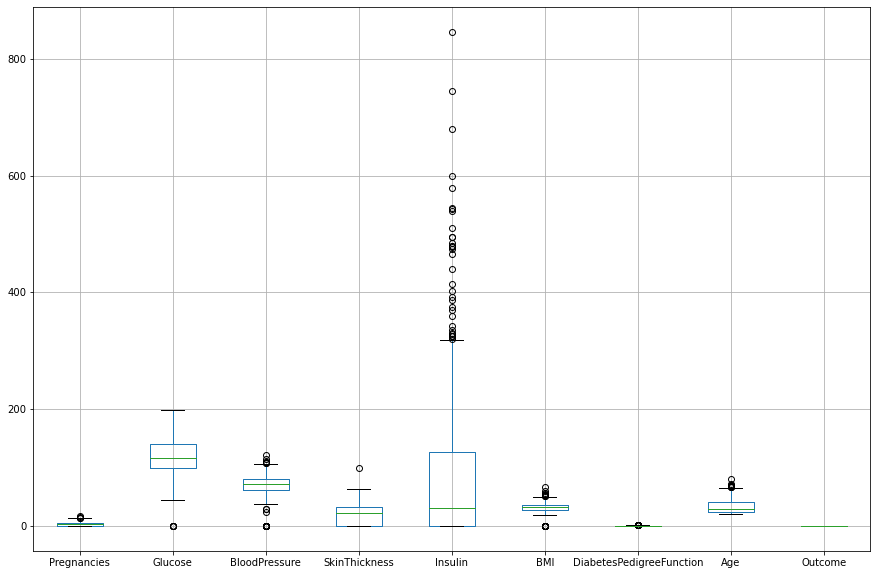

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df.boxplot()

In [20]:
df.Age.min()

21

In [21]:
df.Age.max()

81

In [22]:
def get_outlier(str1):
    q1=df[str1].quantile(0.25)
    q3=df[str1].quantile(0.75)
    iqr=q3-q1
    upper_tail=iqr+1.5*iqr
    lower_tail=iqr-1.5*iqr
    print('upper_tail>>',upper_tail)
    print('lower_tail>>',lower_tail)

In [23]:
get_outlier('Pregnancies')

upper_tail>> 12.5
lower_tail>> -2.5


In [24]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [25]:
df.loc[df['Pregnancies']>12.5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110,22.2,0.245,57,0
72,13,126,90,0,0,43.4,0.583,42,1
86,13,106,72,54,0,36.6,0.178,45,0
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
274,13,106,70,0,0,34.2,0.251,52,0
298,14,100,78,25,184,36.6,0.412,46,1
323,13,152,90,33,29,26.8,0.731,43,1
357,13,129,0,30,0,39.9,0.569,44,1
455,14,175,62,30,0,33.6,0.212,38,1


In [26]:
df.loc[df['Pregnancies']<12.5]['Pregnancies'].mean()

3.6644562334217508

In [27]:
df.loc[df['Pregnancies']<12.5]['Pregnancies'].median()

3.0

In [28]:
(14/768)*100

1.8229166666666667

# Model Training

In [29]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30,stratify=y)

In [32]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
738,2,99,60,17,160,36.6,0.453,21
31,3,158,76,36,245,31.6,0.851,28
168,4,110,66,0,0,31.9,0.471,29
539,3,129,92,49,155,36.4,0.968,32
246,10,122,68,0,0,31.2,0.258,41
...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43
684,5,136,82,0,0,0.0,0.640,69
556,1,97,70,40,0,38.1,0.218,30
763,10,101,76,48,180,32.9,0.171,63


In [33]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
171,6,134,70,23,130,35.4,0.542,29
443,8,108,70,0,0,30.5,0.955,33
459,9,134,74,33,60,25.9,0.460,81
536,0,105,90,0,0,29.6,0.197,46
129,0,105,84,0,0,27.9,0.741,62
...,...,...,...,...,...,...,...,...
69,4,146,85,27,100,28.9,0.189,27
751,1,121,78,39,74,39.0,0.261,28
209,7,184,84,33,0,35.5,0.355,41
765,5,121,72,23,112,26.2,0.245,30


In [34]:
y_train

738    0
31     1
168    0
539    1
246    0
      ..
761    1
684    0
556    0
763    0
634    0
Name: Outcome, Length: 614, dtype: int64

# Logistic Regression

In [35]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

C:\Users\Admin\anaconda3\envs\sugar\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Model Evaluation

In [37]:
#Testing
y_pred_test=log_model.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
conf_matrix=confusion_matrix(y_test,y_pred_test)
clf_report=classification_report(y_test,y_pred_test)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.7792207792207793
Confusion Matrix is::
 [[84 16]
 [18 36]]
Classification report is::
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.67      0.68        54

    accuracy                           0.78       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.78      0.78      0.78       154



In [38]:
#Training
y_pred_train=log_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
conf_matrix=confusion_matrix(y_train,y_pred_train)
clf_report=classification_report(y_train,y_pred_train)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.7736156351791531
Confusion Matrix is::
 [[356  44]
 [ 95 119]]
Classification report is::
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       400
           1       0.73      0.56      0.63       214

    accuracy                           0.77       614
   macro avg       0.76      0.72      0.73       614
weighted avg       0.77      0.77      0.77       614



# KNN CLassifier

In [39]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
normal=MinMaxScaler()
normal_df=normal.fit_transform(x)
normal_df=pd.DataFrame(normal_df,columns=x.columns)
normal_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [40]:
x_train_normal,x_test_normal,y_train_normal,y_test_normal=train_test_split(normal_df,y,random_state=25,test_size=0.2,stratify=y)

In [41]:
x_train_normal

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
546,0.294118,0.939698,0.622951,0.272727,0.244681,0.649776,0.408198,0.533333
720,0.235294,0.417085,0.704918,0.191919,0.000000,0.436662,0.102050,0.216667
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333
184,0.235294,0.708543,0.606557,0.000000,0.000000,0.411326,0.070880,0.316667
325,0.058824,0.788945,0.590164,0.212121,0.198582,0.381520,0.019214,0.050000
...,...,...,...,...,...,...,...,...
582,0.705882,0.608040,0.639344,0.171717,0.000000,0.394933,0.077284,0.683333
314,0.411765,0.547739,0.655738,0.313131,0.000000,0.535022,0.447908,0.366667
167,0.235294,0.603015,0.557377,0.000000,0.000000,0.441133,0.269428,0.216667
49,0.411765,0.527638,0.000000,0.000000,0.000000,0.000000,0.096926,0.050000


In [42]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_train_normal,y_train_normal)

KNeighborsClassifier()

# Model Evaluation

In [43]:
#Testing
y_pred_test=knn_model.predict(x_test_normal)

acc_score=accuracy_score(y_test_normal,y_pred_test)
conf_matrix=confusion_matrix(y_test_normal,y_pred_test)
clf_report=classification_report(y_test_normal,y_pred_test)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.7142857142857143
Confusion Matrix is::
 [[83 17]
 [27 27]]
Classification report is::
               precision    recall  f1-score   support

           0       0.75      0.83      0.79       100
           1       0.61      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [44]:
#Training
y_pred_train=knn_model.predict(x_train_normal)

acc_score=accuracy_score(y_train_normal,y_pred_train)
conf_matrix=confusion_matrix(y_train_normal,y_pred_train)
clf_report=classification_report(y_train_normal,y_pred_train)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.8208469055374593
Confusion Matrix is::
 [[362  38]
 [ 72 142]]
Classification report is::
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       400
           1       0.79      0.66      0.72       214

    accuracy                           0.82       614
   macro avg       0.81      0.78      0.79       614
weighted avg       0.82      0.82      0.82       614



# DecisionTree

In [45]:
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

# Model Evaluation

In [46]:
#Testing
y_pred_test=dt_model.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
conf_matrix=confusion_matrix(y_test,y_pred_test)
clf_report=classification_report(y_test,y_pred_test)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.7337662337662337
Confusion Matrix is::
 [[80 20]
 [21 33]]
Classification report is::
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       100
           1       0.62      0.61      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [47]:
#Training
y_pred_train=dt_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
conf_matrix=confusion_matrix(y_train,y_pred_train)
clf_report=classification_report(y_train,y_pred_train)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 1.0
Confusion Matrix is::
 [[400   0]
 [  0 214]]
Classification report is::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



# Random Forest

In [48]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
#Testing
y_pred_test=rf_model.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
conf_matrix=confusion_matrix(y_test,y_pred_test)
clf_report=classification_report(y_test,y_pred_test)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.7922077922077922
Confusion Matrix is::
 [[84 16]
 [16 38]]
Classification report is::
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [50]:
#Training
y_pred_train=rf_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
conf_matrix=confusion_matrix(y_train,y_pred_train)
clf_report=classification_report(y_train,y_pred_train)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 1.0
Confusion Matrix is::
 [[400   0]
 [  0 214]]
Classification report is::
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       400
           1       1.00      1.00      1.00       214

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614



# AdaBoost

In [51]:
adb_model=AdaBoostClassifier()
adb_model.fit(x_train,y_train)

AdaBoostClassifier()

# Model Evaluation

In [52]:
#Testing
y_pred_test=adb_model.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
conf_matrix=confusion_matrix(y_test,y_pred_test)
clf_report=classification_report(y_test,y_pred_test)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.7922077922077922
Confusion Matrix is::
 [[84 16]
 [16 38]]
Classification report is::
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       100
           1       0.70      0.70      0.70        54

    accuracy                           0.79       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.79      0.79      0.79       154



In [53]:
#Training
y_pred_train=adb_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
conf_matrix=confusion_matrix(y_train,y_pred_train)
clf_report=classification_report(y_train,y_pred_train)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.8241042345276873
Confusion Matrix is::
 [[357  43]
 [ 65 149]]
Classification report is::
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       400
           1       0.78      0.70      0.73       214

    accuracy                           0.82       614
   macro avg       0.81      0.79      0.80       614
weighted avg       0.82      0.82      0.82       614



# Naive Bayes Classifier

In [54]:
bnb_model=BernoulliNB()
bnb_model.fit(x_train,y_train)

BernoulliNB()

# Model Evaluation

In [55]:
#Testing
y_pred_test=bnb_model.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
conf_matrix=confusion_matrix(y_test,y_pred_test)
clf_report=classification_report(y_test,y_pred_test)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.6363636363636364
Confusion Matrix is::
 [[96  4]
 [52  2]]
Classification report is::
               precision    recall  f1-score   support

           0       0.65      0.96      0.77       100
           1       0.33      0.04      0.07        54

    accuracy                           0.64       154
   macro avg       0.49      0.50      0.42       154
weighted avg       0.54      0.64      0.53       154



In [56]:
#Training
y_pred_train=bnb_model.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
conf_matrix=confusion_matrix(y_train,y_pred_train)
clf_report=classification_report(y_train,y_pred_train)
print('Accuracy Score is::',acc_score)
print('Confusion Matrix is::\n',conf_matrix)
print('Classification report is::\n',clf_report)

Accuracy Score is:: 0.6579804560260586
Confusion Matrix is::
 [[392   8]
 [202  12]]
Classification report is::
               precision    recall  f1-score   support

           0       0.66      0.98      0.79       400
           1       0.60      0.06      0.10       214

    accuracy                           0.66       614
   macro avg       0.63      0.52      0.45       614
weighted avg       0.64      0.66      0.55       614



In [57]:
import pickle
pickle.dump(bnb_model,open('Diabetes.pkl','wb'))

In [58]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
bnb_model.predict([[6,134,70,23,130,35.4,0.542,40]])[0]

0

In [61]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [63]:
import pickle
model=pickle.load(open('Diabetes.pkl','rb'))
model.predict([[6,134,70,23,130,35.4,0.542,40]])

array([0], dtype=int64)